In [1]:
from google.colab import files
files.upload()

Saving test_video.mp4 to test_video.mp4


In [ ]:
import cv2
import numpy as np
import IPython
from google.colab.patches import cv2_imshow

In [ ]:
file_name = 'test_video.mp4'

In [4]:
def detectAndDisplay(frame):
  IPython.display.clear_output(wait=True)
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  height, width = gray.shape
  blur = cv2.GaussianBlur(gray, (5,5), 0)
  canny = cv2.Canny(blur, 40, 130)
  mask = np.zeros((height,width), dtype='uint8')
  poly_height = int(0.60 * height)
  poly_left = int(0.47 * width)
  poly_right = int(0.53 * width)
  polygons = np.array([[(0,height),(poly_left, poly_height), (poly_right, poly_height), (width, height)]])
  cv2.fillPoly(mask, polygons, 255)
  masked = cv2.bitwise_and(canny, mask)
  lines = cv2.HoughLinesP(masked, 2, np.pi/180, 20, np.array([]), 20, 10)
  for line in lines:
    for x1, y1, x2, y2 in line:
      cv2.line(frame, (x1,y1), (x2,y2), (0,255,0), 5)
  cv2_imshow(frame)

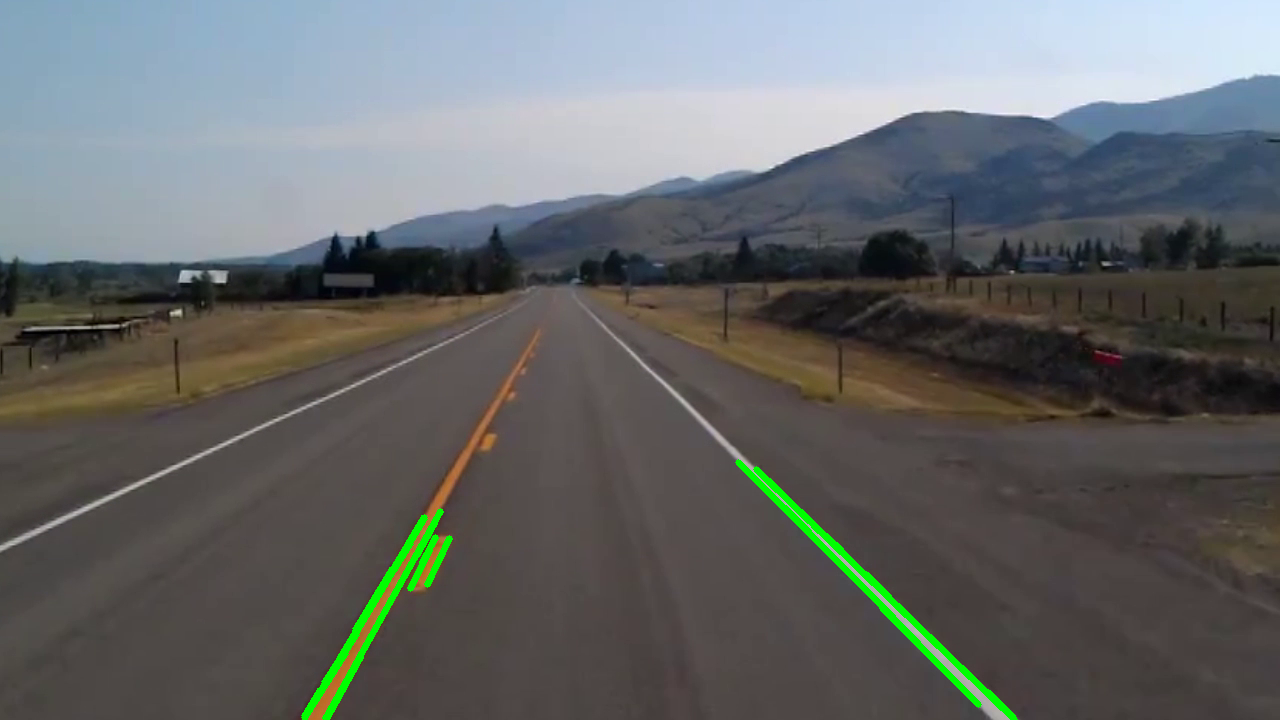

In [ ]:
cap = cv2.VideoCapture(file_name)
if not cap.isOpened:
  print("File load error")
  exit(0)

while True:
  ret, frame = cap.read()
  if frame is None:
    print("Done")
    break
  detectAndDisplay(frame)